K-NEAREST NEIGHBOURS
Objective:
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


TAsk1 :
 Analyse the data using the visualizations

In [1]:
import pandas as pd
df=pd.read_csv("/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.shape

(101, 18)

In [3]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

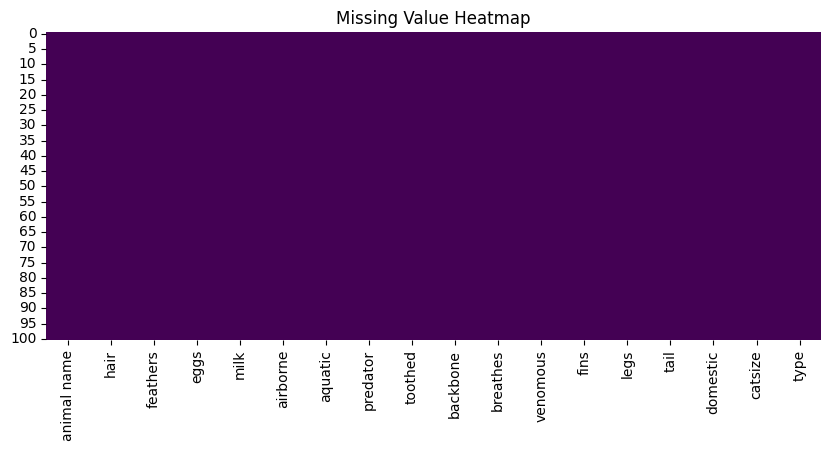

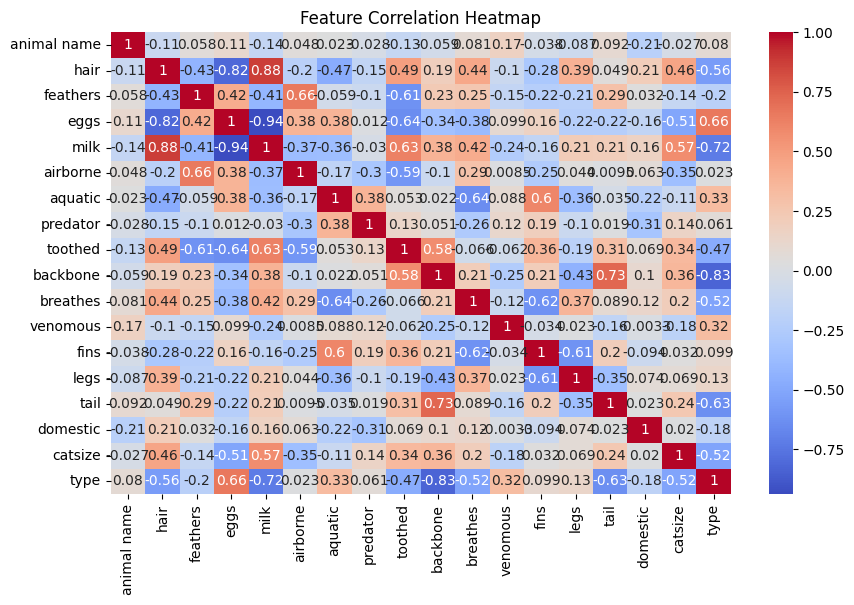

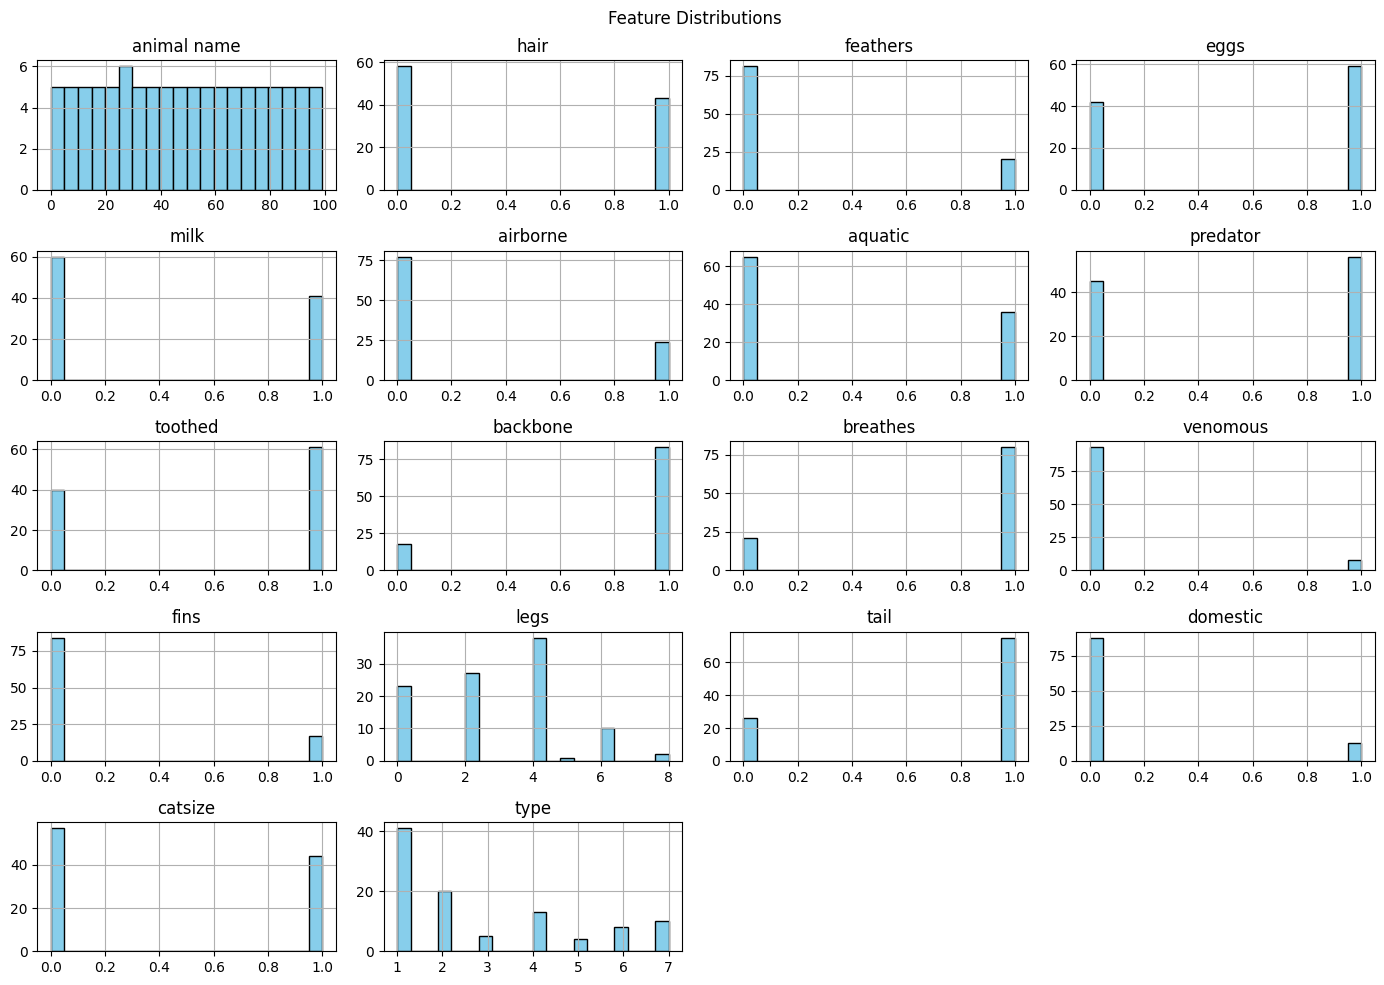

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize missing data (if any)
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


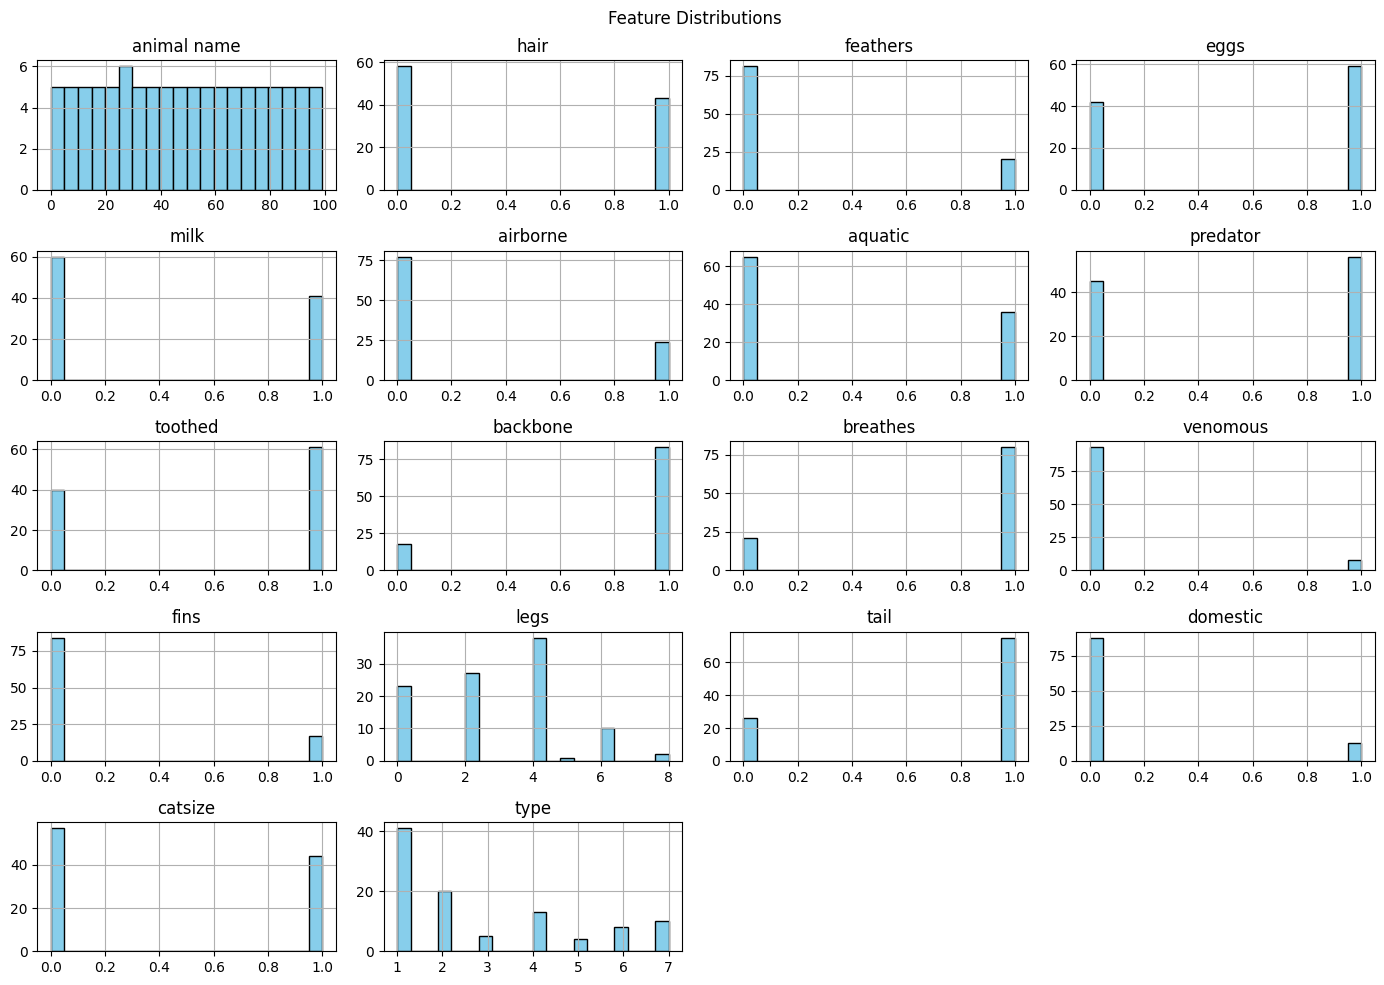

In [16]:
# Distribution of each feature
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

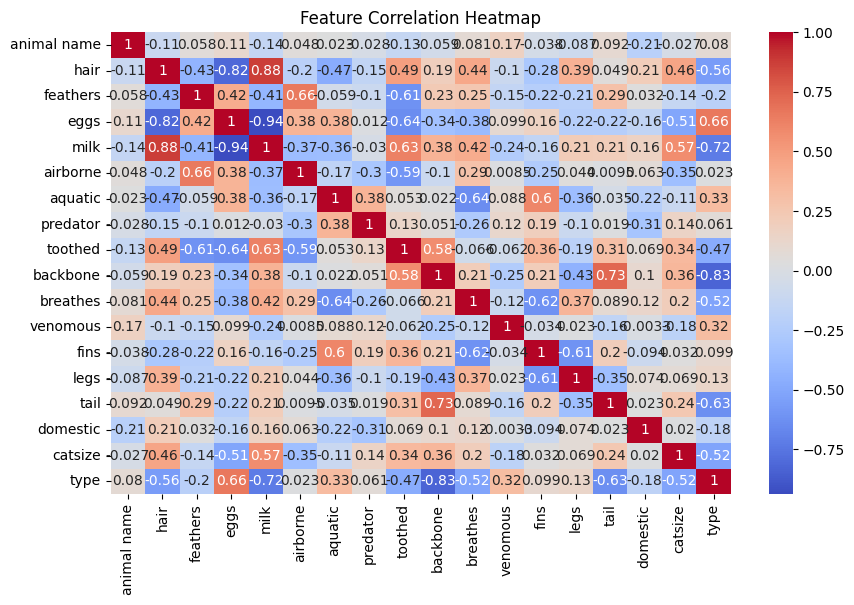

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Task

 2: Preprocess the data by handling missing values & outliers


In [17]:
import numpy as np
from scipy import stats
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [18]:
df_clean = df.dropna()

In [19]:
print("\nAfter handling missing values:\n", df_clean.isnull().sum())


After handling missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [21]:
numeric_cols = df_clean.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_cols))
# Define threshold (commonly 3)
threshold = 3
# Keep only rows where all z-scores are below the threshold
df_outlier_free = df_clean[(z_scores < threshold).all(axis=1)]

print(f"\nOriginal shape: {df.shape}")
print(f"After removing missing values: {df_clean.shape}")
print(f"After removing outliers: {df_outlier_free.shape}")


Original shape: (101, 18)
After removing missing values: (101, 18)
After removing outliers: (93, 18)


In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
print("Numerical columns:")
print(numerical_cols.columns.tolist())

Numerical columns:
['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   animal name  101 non-null    int64
 1   hair         101 non-null    int64
 2   feathers     101 non-null    int64
 3   eggs         101 non-null    int64
 4   milk         101 non-null    int64
 5   airborne     101 non-null    int64
 6   aquatic      101 non-null    int64
 7   predator     101 non-null    int64
 8   toothed      101 non-null    int64
 9   backbone     101 non-null    int64
 10  breathes     101 non-null    int64
 11  venomous     101 non-null    int64
 12  fins         101 non-null    int64
 13  legs         101 non-null    int64
 14  tail         101 non-null    int64
 15  domestic     101 non-null    int64
 16  catsize      101 non-null    int64
 17  type         101 non-null    int64
dtypes: int64(18)
memory usage: 14.3 KB
None


In [25]:
df = df.dropna()

# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show shapes before and after
print(f"Original shape: {df.shape}")
print(f"After removing outliers (IQR method): {df_no_outliers.shape}")

Original shape: (101, 18)
After removing outliers (IQR method): (33, 18)


TASK 3: Split the Dataset into Training and Testing Sets (80/20)

Before training the model, we must:

Separate features (X) and target (y)

Split the data into 80% training and 20% testing sets using train_test_split.

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_no_outliers.drop('type', axis=1)  # Features
y = df_no_outliers['type']               # Target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for balanced classes
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (26, 17)
Testing set shape: (7, 17)


TASK4:

4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# 1. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# 2. Initialize KNN classifier
k = 5  # We'll start with K=5 (will tune later)
knn = KNeighborsClassifier(n_neighbors=k)

In [32]:
# 3. Train the model
knn.fit(X_train_scaled, y_train)

print("✅ KNN model has been trained with K =", k)



✅ KNN model has been trained with K = 5


 TASK 5: Choose an Appropriate Distance Metric and Value for K


K (number of neighbors) affects bias-variance:

Small K → Low bias, High variance (overfitting)

Large K → High bias, Low variance (underfitting)

Distance Metric:

'euclidean': default; best for continuous features

'manhattan': better when data has outliers or grid-like structures

'minkowski': general form; when p=1 it's Manhattan, when p=2 it's Euclidean

In [33]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Try K values from 1 to 20
k_range = range(1, 21)
cv_scores = []

In [34]:

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # You can change to 'manhattan'
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

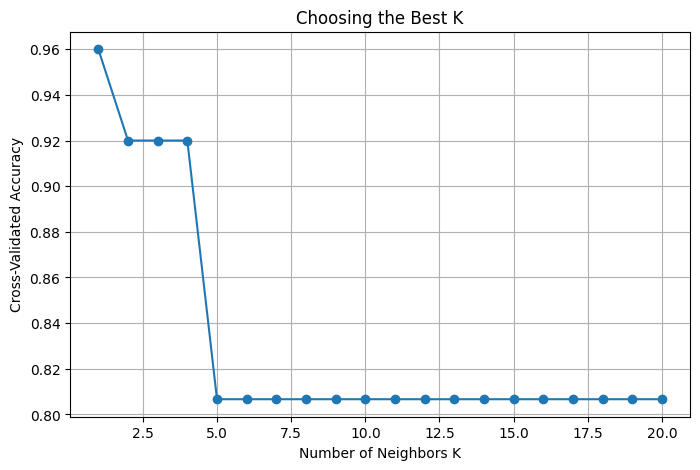

In [35]:
# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the Best K')
plt.grid(True)
plt.show()

In [36]:
# Best K value
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"✅ Best K found: {best_k} with accuracy = {max(cv_scores):.4f}")

✅ Best K found: 1 with accuracy = 0.9600


In [38]:
# Final model with best K
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_final.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)


TASK6: Evaluate the KNN Classifier on the Testing Set

Accuracy

Precision

Recall

F1-Score

(Optional) Confusion Matrix and Classification Repor

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:

# Predict on test set
y_pred = knn_final.predict(X_test_scaled)

In [44]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # change to 'macro' for unbalanced
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("✅ Evaluation Results:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

✅ Evaluation Results:
Accuracy  : 0.7143
Precision : 0.7143
Recall    : 0.7143
F1-Score  : 0.7143


In [46]:

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


📋 Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           3       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.71      0.71      0.71         7



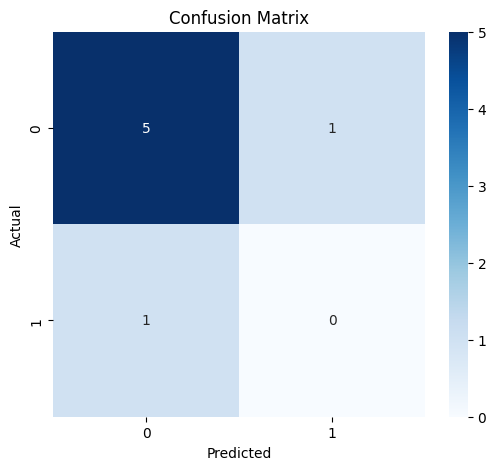

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


7: Visualize the Decision Boundaries of the KNN Classifier

In [48]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [49]:

# Step 1: Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [50]:
# Step 2: Train a new KNN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:

# Step 3: Create a mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

In [52]:

# Step 4: Predict on the grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

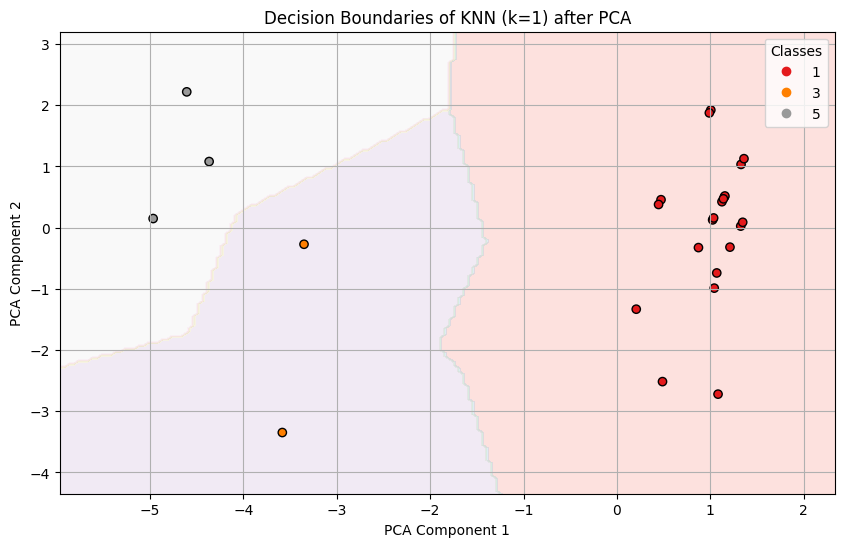

In [53]:
# Step 5: Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Decision Boundaries of KNN (k={best_k}) after PCA')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()




Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


1.what are key hyperparameters in knn?



1. K (n_neighbors): Number of nearest neighbors to consider.
2. Distance Metric: How to measure distance between points (e.g., Euclidean, Manhattan).
3. Weighting: How to weight the neighbors' votes (e.g., uniform, distance-based).
1. p (for Minkowski distance): The power parameter for the Minkowski distance metric. For example, p=2 corresponds to Euclidean distance, while p=1 corresponds to Manhattan distance.
2. leaf_size (for BallTree or KDTree): The leaf size of the BallTree or KDTree data structure. This can affect the efficiency of the nearest neighbor search.
3. n_jobs: The number of CPU cores to use for parallel processing. This can speed up the computation of nearest neighbors for large datasets.



2.

2.What distance metrics can be used in KNN?

1. Euclidean Distance: Measures the straight-line distance between two points.
2. Manhattan Distance (L1 Distance): Measures the sum of the absolute differences between corresponding coordinates.
3. Minkowski Distance: A generalization of Euclidean and Manhattan distances, with a parameter (p) that determines the type of distance.
4. Cosine Distance: Measures the cosine of the angle between two vectors, often used for text or image data.
5. Hamming Distance: Measures the number of positions at which two vectors differ, often used for categorical data.
